<a href="https://colab.research.google.com/github/Pratikshya49/Ai-Final-/blob/main/2507009_PratikshyaBasnet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Default Prediction
**Student:** [Pratikshya Basnet] | **ID:** [2507009] | **Date:** Feb 2026

**UN SDG Alignment:** SDG 1 (No Poverty) & SDG 10 (Reduced Inequalities) - Helps prevent over-lending and promotes fair credit access

## Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

print(" Libraries loaded!")

 Libraries loaded!


## Step 2: Load Data

**Dataset:** UCI Credit Card Default (Taiwan, 2005)
- 30,000 customers
- Predicts if customer will default next month
- Features: demographics, payment history, bill amounts

In [ ]:

# Load data - UPDATE THIS PATH
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('UCI_Credit_Card.csv', encoding ='latin1')

print("Shape:", df.shape)
print("\nFirst 3 rows:")
df.head(3)

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv
Shape: (30000, 25)

First 3 rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [ ]:
# Basic info
print("Columns:", list(df.columns))
print("\nMissing values:", df.isnull().sum().sum())
print("\nBasic stats:")
df.describe()

Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']

Missing values: 0

Basic stats:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Questions this dataset answers:**
1. What factors predict credit card default?
2. Can we identify risky customers early?
3. How important is payment history?

## Step 3: Exploratory Data Analysis (EDA)

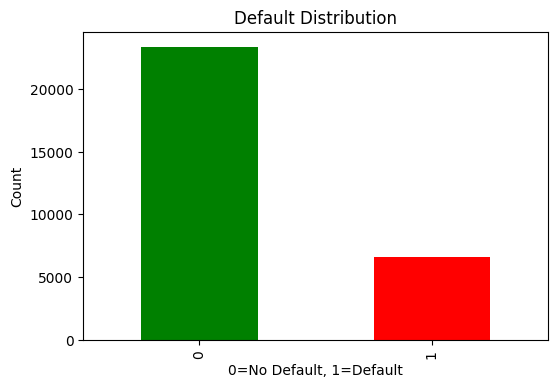

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

Percentage:
default.payment.next.month
0    77.88
1    22.12
Name: proportion, dtype: float64


In [ ]:
# Target variable
target = 'default.payment.next.month'

plt.figure(figsize=(6, 4))
df[target].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Default Distribution')
plt.xlabel('0=No Default, 1=Default')
plt.ylabel('Count')
plt.show()

print(df[target].value_counts())
print("\nPercentage:")
print(df[target].value_counts(normalize=True)*100)

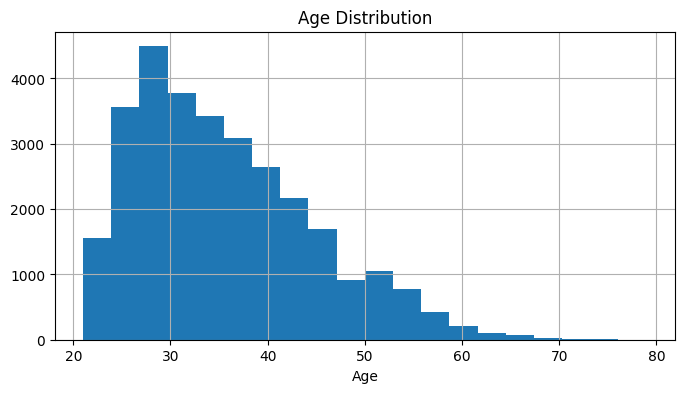

Age stats: count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


In [ ]:
# Age distribution
plt.figure(figsize=(8, 4))
df['AGE'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

print("Age stats:", df['AGE'].describe())

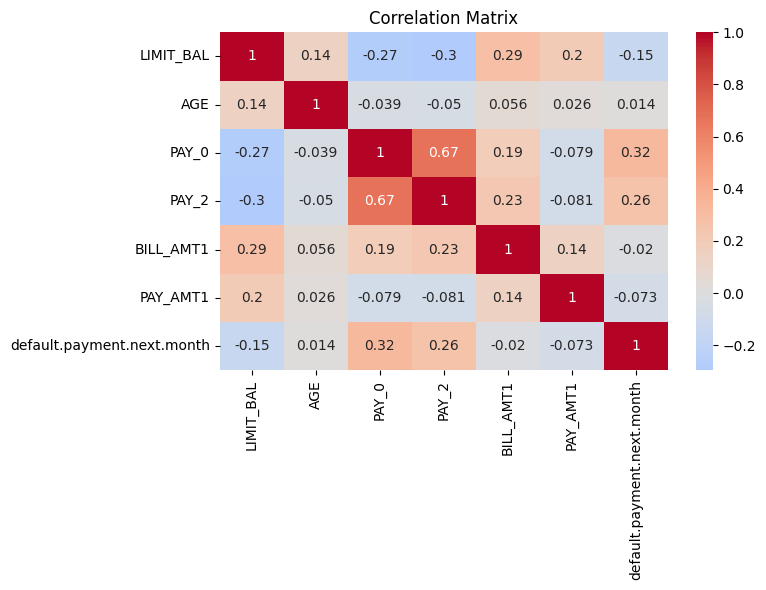

In [ ]:
# Correlation heatmap
key_cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'PAY_AMT1', target]

plt.figure(figsize=(8, 6))
sns.heatmap(df[key_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**EDA Insights:**
- 78% no default, 22% default (imbalanced)
- Most customers aged 25-45
- Payment status (PAY_0, PAY_2) correlates with default

## Step 4: Prepare Data

In [ ]:
# Separate features and target
X = df.drop(['ID', target], axis=1)
y = df[target]

print("Features:", X.shape)
print("Target:", y.shape)

Features: (30000, 23)
Target: (30000,)


In [ ]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (24000, 23)
Test: (6000, 23)


In [ ]:
# Scale features (important for Neural Networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Data scaled!")

 Data scaled!


## Step 5: Build Neural Network

In [ ]:
# Neural Network with 2 hidden layers
# Layer 1: 64 neurons, Layer 2: 32 neurons
# Activation: ReLU, Optimizer: Adam

nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

print("Training Neural Network...")
nn.fit(X_train_scaled, y_train)
print(" Done!")

Training Neural Network...
 Done!


In [ ]:
# Evaluate Neural Network
y_pred_nn = nn.predict(X_test_scaled)

print("NEURAL NETWORK RESULTS:")
print("="*40)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_nn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_nn):.4f}")

NEURAL NETWORK RESULTS:
Accuracy:  0.7947
Precision: 0.5531
Recall:    0.3730
F1-Score:  0.4455


## Step 6: Build Two Classical ML Models

In [ ]:
# Model 1: Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("LOGISTIC REGRESSION:")
print("="*40)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_lr):.4f}")

LOGISTIC REGRESSION:
Accuracy:  0.8077
Precision: 0.6868
Recall:    0.2396
F1-Score:  0.3553


In [ ]:
# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("RANDOM FOREST:")
print("="*40)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")

RANDOM FOREST:
Accuracy:  0.8117
Precision: 0.6308
Recall:    0.3580
F1-Score:  0.4567


In [ ]:
# Compare initial models
print("\nINITIAL COMPARISON:")
print("="*60)
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
    ]
})
print(comparison)


INITIAL COMPARISON:
                 Model  Accuracy  F1-Score
0  Logistic Regression  0.807667  0.355307
1        Random Forest  0.811667  0.456731


## Step 7: Hyperparameter Tuning

In [ ]:
# Tune Logistic Regression
print("Tuning Logistic Regression...")

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lr_params,
    cv=5,
    scoring='f1'
)

lr_grid.fit(X_train_scaled, y_train)

print("Best params:", lr_grid.best_params_)
print("Best CV score:", f"{lr_grid.best_score_:.4f}")

Tuning Logistic Regression...
Best params: {'C': 10, 'solver': 'liblinear'}
Best CV score: 0.3667


In [ ]:
# Tune Random Forest
print("Tuning Random Forest...")

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='f1'
)

rf_grid.fit(X_train_scaled, y_train)

print("Best params:", rf_grid.best_params_)
print("Best CV score:", f"{rf_grid.best_score_:.4f}")

Tuning Random Forest...
Best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.4780


## Step 8: Feature Selection

In [ ]:
# Select top 15 features using SelectKBest
# Method: ANOVA F-test (good for classification)

selector = SelectKBest(f_classif, k=15)
selector.fit(X_train_scaled, y_train)

# Get feature names
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("TOP 15 FEATURES:")
print("="*40)
print(feature_scores.head(15))

selected_features = feature_scores.head(15)['Feature'].tolist()
print("\nSelected:", selected_features)

TOP 15 FEATURES:
      Feature        Score
5       PAY_0  2886.544687
6       PAY_2  1820.308453
7       PAY_3  1452.929575
8       PAY_4  1221.317195
9       PAY_5  1034.194984
10      PAY_6   886.224835
0   LIMIT_BAL   638.567021
17   PAY_AMT1   130.137085
18   PAY_AMT2   102.067440
20   PAY_AMT4    73.646953
19   PAY_AMT3    69.825753
22   PAY_AMT6    68.318259
21   PAY_AMT5    66.605013
1         SEX    46.258660
2   EDUCATION    16.392493

Selected: ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT6', 'PAY_AMT5', 'SEX', 'EDUCATION']


In [ ]:
# Transform data with selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

print("Original features:", X_train_scaled.shape[1])
print("Selected features:", X_train_selected.shape[1])

Original features: 23
Selected features: 15


**Why SelectKBest?**
- Fast and simple
- Removes irrelevant features
- Reduces overfitting
- Uses statistical test (F-score)

## Step 9: Final Models with Best Parameters + Selected Features

In [ ]:
# Final Logistic Regression
lr_final = LogisticRegression(
    **lr_grid.best_params_,
    random_state=42,
    max_iter=1000
)
lr_final.fit(X_train_selected, y_train)

# Get CV score
lr_cv = cross_val_score(lr_final, X_train_selected, y_train, cv=5, scoring='f1').mean()

# Test predictions
y_pred_lr_final = lr_final.predict(X_test_selected)

print("FINAL LOGISTIC REGRESSION:")
print("="*40)
print(f"CV Score:  {lr_cv:.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr_final):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr_final):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_lr_final):.4f}")

FINAL LOGISTIC REGRESSION:
CV Score:  0.3596
Accuracy:  0.8088
Precision: 0.7036
Recall:    0.2344
F1-Score:  0.3516


In [ ]:
# Final Random Forest
rf_final = RandomForestClassifier(
    **rf_grid.best_params_,
    random_state=42
)
rf_final.fit(X_train_selected, y_train)

# Get CV score
rf_cv = cross_val_score(rf_final, X_train_selected, y_train, cv=5, scoring='f1').mean()

# Test predictions
y_pred_rf_final = rf_final.predict(X_test_selected)

print("FINAL RANDOM FOREST:")
print("="*40)
print(f"CV Score:  {rf_cv:.4f}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_final):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf_final):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf_final):.4f}")

FINAL RANDOM FOREST:
CV Score:  0.4809
Accuracy:  0.8162
Precision: 0.6451
Recall:    0.3753
F1-Score:  0.4745


## Step 10: Final Comparison Table

In [ ]:
# Create comparison table
final_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Features': ['Selected (15)', 'Selected (15)'],
    'CV Score': [lr_cv, rf_cv],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_final),
        accuracy_score(y_test, y_pred_rf_final)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr_final),
        precision_score(y_test, y_pred_rf_final)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr_final),
        recall_score(y_test, y_pred_rf_final)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr_final),
        f1_score(y_test, y_pred_rf_final)
    ]
})

print("\nFINAL MODEL COMPARISON:")
print("="*80)
print(final_results.to_string(index=False))

best_idx = final_results['F1-Score'].idxmax()
print("\n BEST MODEL:", final_results.loc[best_idx, 'Model'])
print("F1-Score:", f"{final_results.loc[best_idx, 'F1-Score']:.4f}")


FINAL MODEL COMPARISON:
              Model      Features  CV Score  Accuracy  Precision   Recall  F1-Score
Logistic Regression Selected (15)  0.359648  0.808833   0.703620 0.234363  0.351611
      Random Forest Selected (15)  0.480899  0.816167   0.645078 0.375283  0.474512

 BEST MODEL: Random Forest
F1-Score: 0.4745


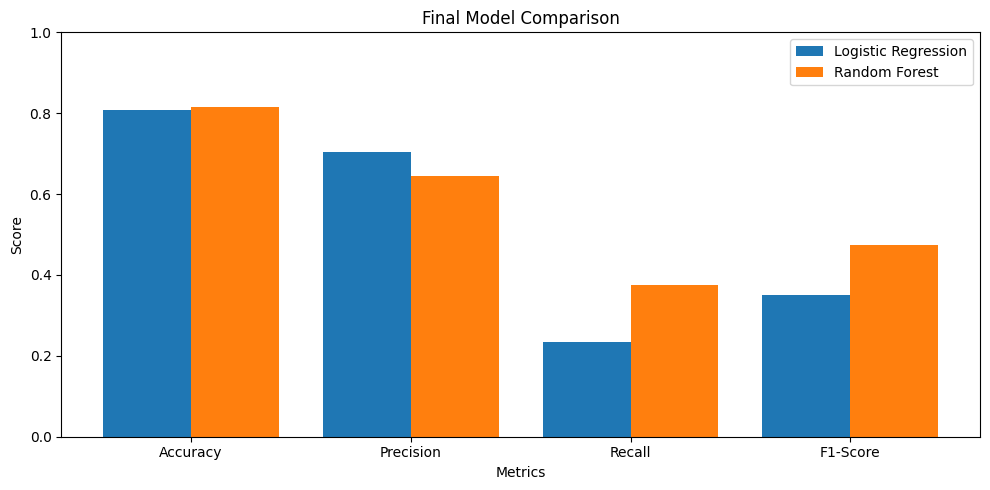

In [ ]:
# Visualize comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, final_results.iloc[0][metrics], 0.4, label='Logistic Regression')
plt.bar(x + 0.2, final_results.iloc[1][metrics], 0.4, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Final Model Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim([0, 1])
plt.tight_layout()
plt.show()